Unsupervised learning - Clustering

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
X = pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
y = df['label']
n_y = len(y.unique()) #number of different labels
y = df['label'].to_numpy()


Number of cluster selection: we evaluate the proper number of clusters on the silhouette score in a validation computing the silhouette score for differents number cluster of parameters for each clustering algorithm chosen

Gaussian Mixture

Best number of clusters: 16 with corresponding silhouette score: 0.5019997358404672


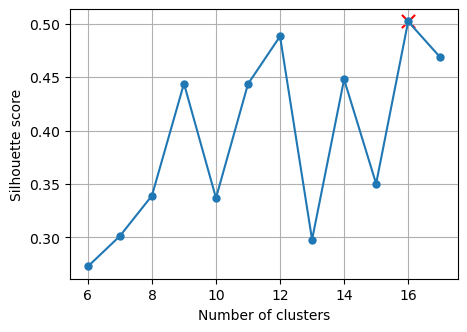

Other metrics: log-likehood, ri, ari


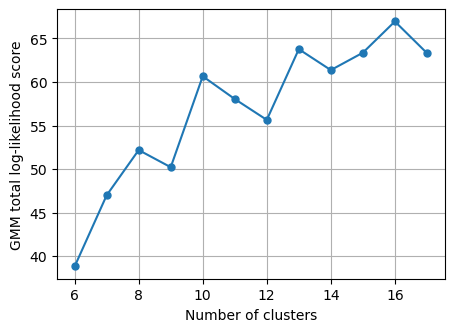

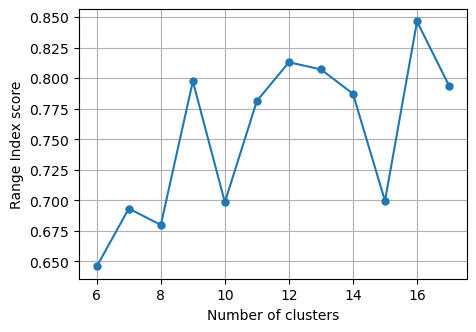

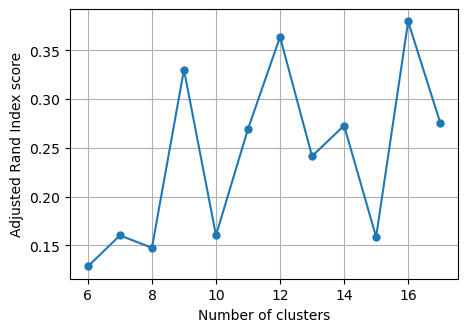

In [18]:
n_cluster = []
sh_scores = []
ri_scores = []
ari_scores = []
log_l_list = []

for n in range (int(n_y / 2), int(1.5 * n_y)):
    gmm = GaussianMixture(n_components=n)
    labels = gmm.fit_predict(X)
    n_cluster.append(n)
    sh_scores.append(silhouette_score(X, labels))
    ri_scores.append(rand_score(np.ravel(y), labels))
    ari_scores.append(adjusted_rand_score(np.ravel(y), labels))
    log_l_list.append(gmm.score(X))

best_sh = np.max(sh_scores)
best_n = n_cluster[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, sh_scores, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score') 
plt.show()

print("Other metrics: log-likehood, ri, ari")

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, ri_scores, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Range Index score')
plt.show()

plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster, ari_scores, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted Rand Index score')
plt.show()


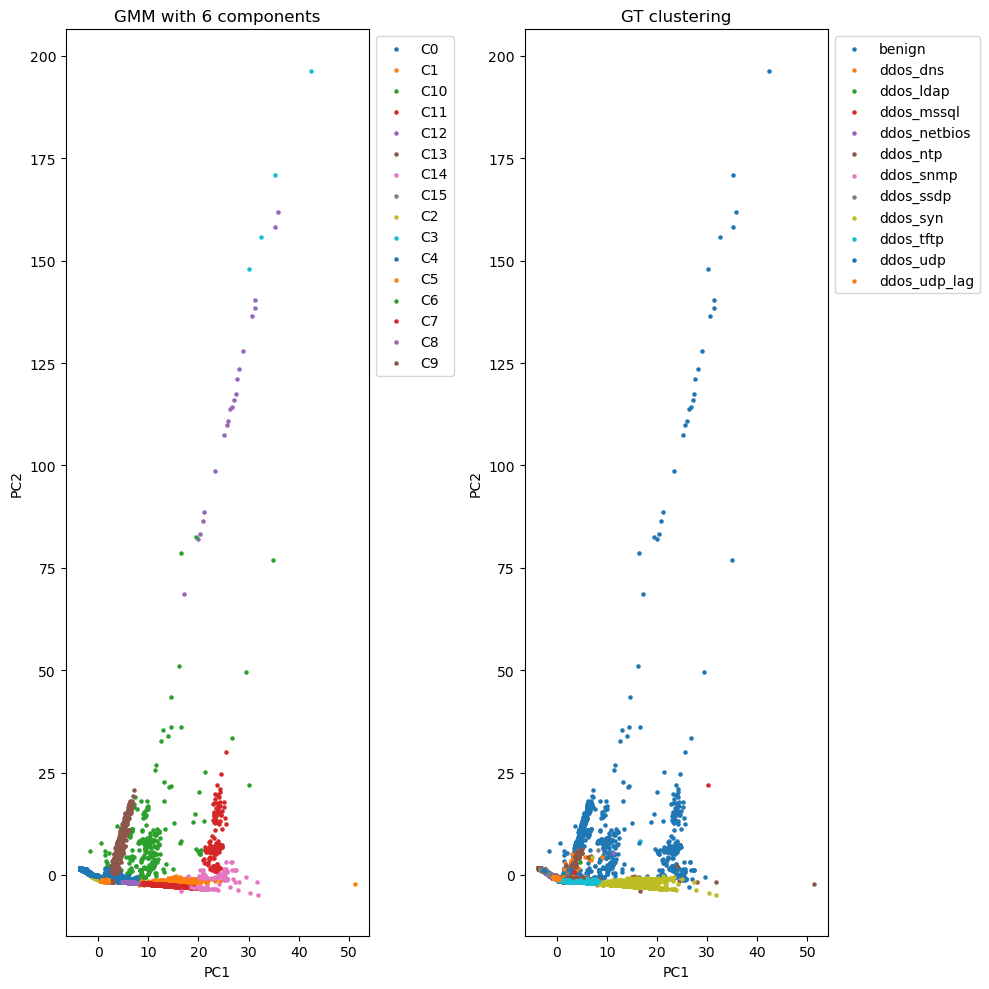

In [17]:
pca_result =pd.read_csv('pca_dataframe.csv').to_numpy()[:,:2]

df = pd.DataFrame(pca_result)

gmm = GaussianMixture(n_components=16)
labels = gmm.fit_predict(df)
df['cid'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(10,10))

for i in np.unique(df.cid):
    subdf = df[df.cid == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('GMM with 6 components')

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
plt.tight_layout()
plt.show()

DBSCAN

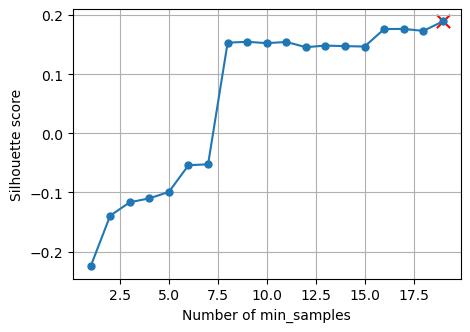

In [7]:
sh_scores = []
n_samples = []

for min in range(1, 20):
    
    dbscan = DBSCAN(min_samples=min)
    labels = dbscan.fit_predict(X)
    sh_scores.append(silhouette_score(X, labels))
    n_samples.append(min)

best_sh = np.max(sh_scores)
best_n = n_samples[np.argmax(sh_scores)]

plt.figure(figsize=(5, 3.5))
plt.plot(n_samples, sh_scores, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of min_samples')
plt.ylabel('Silhouette score') 
plt.show()


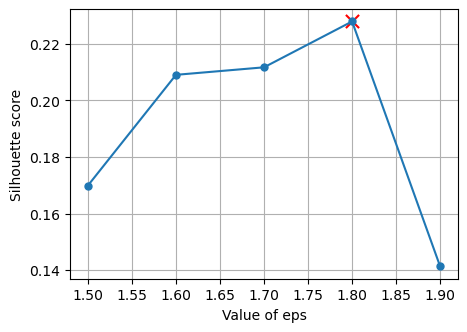

In [7]:
sh_scores =[]
eps_values = []

for eps in np.arange(1.5, 2, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=19)
    labels = dbscan.fit_predict(X)
    sh_scores.append(silhouette_score(X, labels))
    eps_values.append(eps)

best_sh = np.max(sh_scores)
best_eps = eps_values[np.argmax(sh_scores)]

plt.figure(figsize=(5, 3.5))
plt.plot(eps_values, sh_scores, marker='o', markersize=5)
plt.scatter(best_eps, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Value of eps')
plt.ylabel('Silhouette score') 
plt.show()


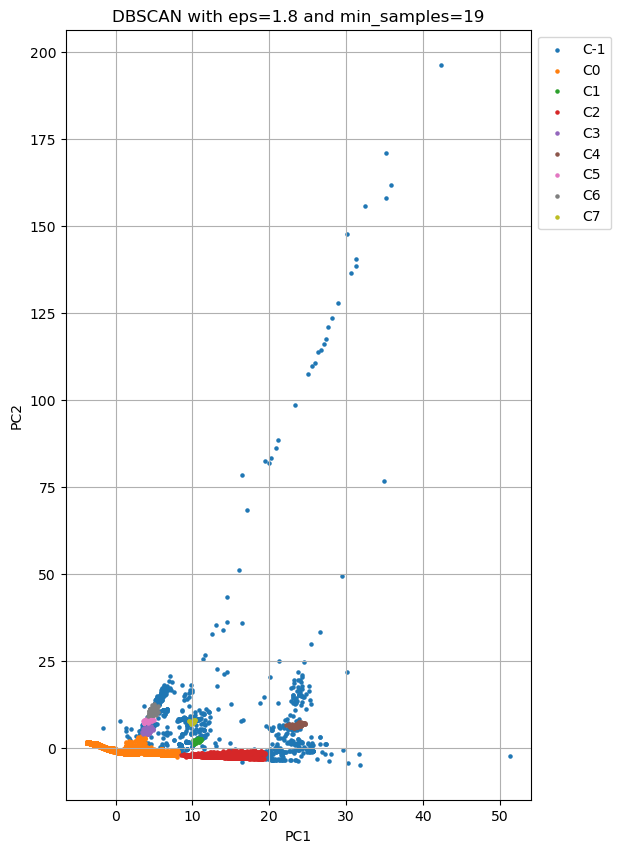

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=19)
df = X[:,:2].copy()

labels = dbscan.fit_predict(df)
df = pd.DataFrame(df)
df['cid'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

plt.figure(figsize=(6,10))
for i in np.unique(df.cid):
    subdf = df[df.cid == i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN with eps=1.8 and min_samples=19')
plt.show()
